Number of iterations it took for convergence:  16736


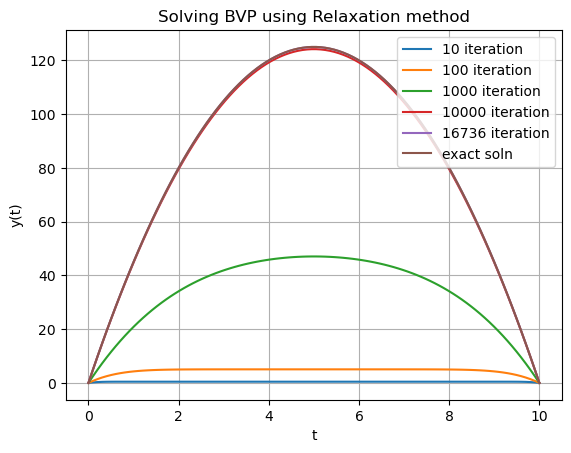

In [9]:
import matplotlib.pyplot as plt
import numpy as np

g=10

def ydda(t,y,y_prime):
    return -g*np.ones(len(t))


def relaxation_ode_solver(f,y0,y_last,t_arr,tol=1e-4,max_iter=int(1e6)): 
    y_arr=np.zeros((len(t_arr)))
    y_mat=np.zeros((max_iter,len(t_arr)))
    y_arr[0]=y0
    y_arr[-1]=y_last
    y_mat[0,:]=y_arr
    h=t_arr[1]-t_arr[0]
    for i in range(1,max_iter):
        y_arr[1:-1]=0.5*(y_arr[2:]+y_arr[:-2])-0.5*(h**2)*f(t_arr[1:-1],y_arr[1:-1],((y_arr[2:]+y_arr[:-2])/(2*h)))
        y_mat[i,:]=y_arr
        if np.linalg.norm(y_mat[i,:]-y_mat[i-1,:])<tol:
            return y_mat[0:i],i
    return y_mat,"soln did not converge"

def exact_soln(t_arr):
    return 50*t_arr-(0.5*10*(t_arr**2))

t0=0
t1=10
x0=0
x1=0
t_arr=np.linspace(t0,t1,100)

y_mat,iteration=relaxation_ode_solver(ydda,x0,x1,t_arr)
print("Number of iterations it took for convergence: ",iteration)
iter_arr=[10,100,1000,10000,iteration]

y_true=exact_soln(t_arr)

for i in iter_arr:
    plt.plot(t_arr,y_mat[i-1,:],label=str(i)+" iteration")
plt.plot(t_arr,y_true,label="exact soln")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solving BVP using Relaxation method")
plt.show()

### I took help of Yash Vardhan in this problem. But I completely understood the code.